# Advanced RMSD

In [2]:
import prody as pdy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context('talk')
sns.set_palette('Set2')

In [2]:
class processor:
    def __init__(self, dcd_file, psf_file, selection_strings):
        dcd = pdy.DCDFile(dcd_file)
        psf = pdy.parsePSF(psf_file)
        dcd.link(psf)
        self.dcd = dcd
        self.psf = psf
        self.sel = selection_strings
    def getRMSDs(self):
        rmsd = np.zeros((self.dcd.numFrames(), len(self.sel)), dtype='float32')
        for i, fr in enumerate(self.dcd):
            atoms_ = fr.getAtoms()    
            molecule_components = [atoms_.select(i) for i in self.sel]
            if i == 0:
                ref = [i.getCoords() for i in molecule_components]
            else:
                rmsd[i,:] = [
                    pdy.calcRMSD(reference=i, target=j) 
                    for i,j in zip(ref, molecule_components)
                ]
        return rmsd


In [3]:
rmsd_sel = [
    'not protein and name ' + ' '.join(['C%d' % i for i in range(19)]),
    'not protein',
    'backbone'
]

In [4]:
folder_names = dict(
    prup3_lig_A = dict(
        mol='ligand', 
        orientation = 'A',
        dcd = 'C:/scratch/cafe/lig_A/prup3_lig_A_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/lig_A/prup3_lig_A_charmm.psf'
    ),
    prup3_lig_B = dict(
        mol='ligand', 
        orientation = 'B',
        dcd = 'C:/scratch/cafe/lig_B/prup3_lig_B_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/lig_B/prup3_lig_B_charmm.psf'
    ),
    prup3_ps_A = dict(
        mol='phytosphingosine', 
        orientation = 'A',
        dcd = 'C:/scratch/cafe/ps_A/prup3_ps_A_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/ps_A/prup3_ps_A_charmm.psf'
    ),
    prup3_ps_B = dict(
        mol='phytosphingosine', 
        orientation = 'B',
        dcd = 'C:/scratch/cafe/ps_B/prup3_ps_B_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/ps_B/prup3_ps_B_charmm.psf'
    ),
    prup3_s_A = dict(
        mol='sphingosine', 
        orientation = 'A',
        dcd = 'C:/scratch/cafe/sp_A/prup3_s_A_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/sp_A/prup3_s_A_charmm.psf'
    ),
    prup3_s_B = dict(
        mol='sphingosine', 
        orientation = 'B',
        dcd = 'C:/scratch/cafe/sp_B/prup3_s_B_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/sp_B/prup3_s_B_charmm.psf'
    ),
)


In [5]:
rmsd_list = []
for key, items in folder_names.items():
    tmp_rmsd_calculator = processor(
        dcd_file=items['dcd'], 
        psf_file=items['psf'],
        selection_strings = rmsd_sel
    )
    tmp_rmsd = tmp_rmsd_calculator.getRMSDs()
    for i, var in enumerate(['ligand', 'whole_ligand', 'protein']):
        tmp = pd.DataFrame(tmp_rmsd[:,i], columns=['RMSD'])
        tmp['entity'] = var
        tmp['molecule'] = items['mol']
        tmp['orientation'] = items['orientation']
        rmsd_list.append(tmp)

C:\Users\Bruno\Anaconda3\lib\site-packages\prody\atomic\subset.py:35: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  elif not np.issubdtype(indices.dtype, int):


In [6]:
rmsd_df = pd.concat(rmsd_list)
rmsd_df['time'] = rmsd_df.index * 0.04

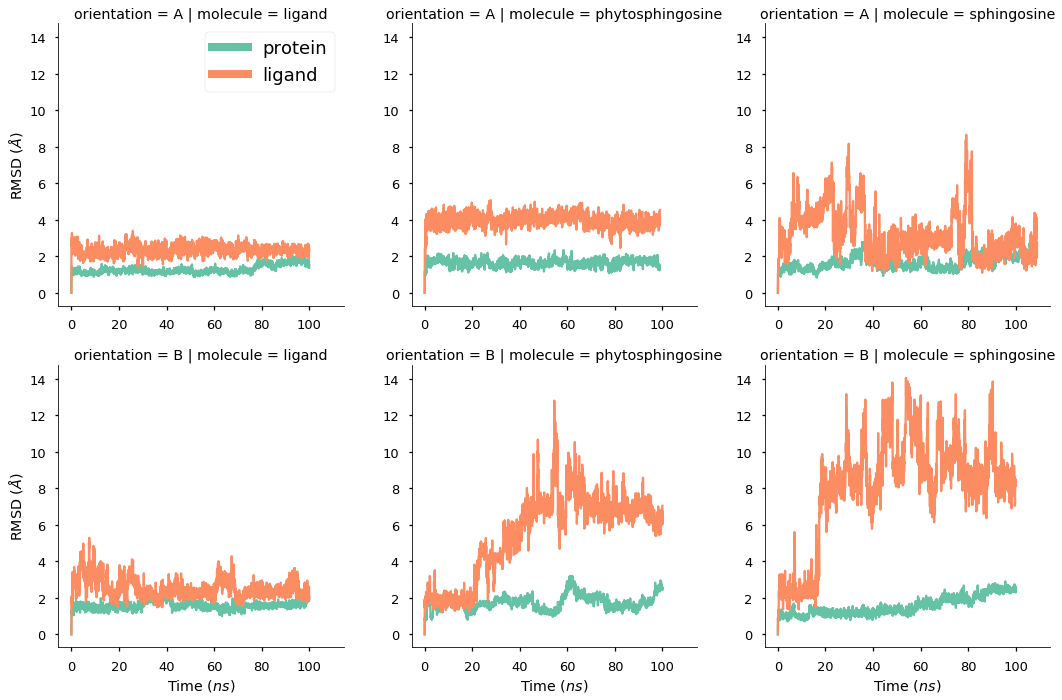

In [7]:
g = sns.FacetGrid(
    data = rmsd_df.query('entity == "protein" or entity == "ligand"'), 
    hue ='entity', hue_order= ['protein', 'ligand'], col = 'molecule', row = 'orientation', size =5
)
g.map(plt.plot, 'time', 'RMSD', alpha = 1.0)
g.set_xlabels('Time $(ns)$')
g.set_ylabels('RMSD $(\AA)$')
leg = g.axes[0,0].legend(framealpha=None, fontsize = 18)
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.tight_layout()
plt.savefig('C:/Users/Bruno/ownCloud/publication/ltp_2019/figure_n1.png', dpi=300)
plt.show()

In [8]:
rep_names= dict(
    rep1A = dict(
        psf = 'F:/DM/run1/prup3_lig_A/prup3_lig_A_charmm.psf',
        dcd = 'F:/DM/run1/prup3_lig_A/prup3_lig_A_nwater_pbcsolved.dcd',
        name = 'ligA',
        mol = 'ligand',
        orientation = 'A',
        rep = 1
    ),
    rep2A = dict(
        psf = 'C:/scratch/cafe/lig_A_2/prup3_lig_A_charmm.psf',
        dcd = 'F:/DM/run3/ligA/rep1/rep1.dcd',
        name = 'ligA',
        mol = 'ligand',
        orientation = 'A',
        rep = 2
    ),
    rep3A = dict(
        psf = 'C:/scratch/cafe/lig_A_3/prup3_lig_A_charmm.psf',
        dcd = 'F:/DM/run3/ligA/rep2/rep2.dcd',
        name = 'ligA',
        mol = 'ligand',
        orientation = 'A',
        rep = 3
    ),
    rep1B = dict(
        psf = 'F:/DM/run1/prup3_lig_B/prup3_lig_B_charmm.psf',
        dcd = 'F:/DM/run1/prup3_lig_B/prup3_lig_B_nwater_pbcsolved.dcd',
        name = 'ligB',
        mol = 'ligand',
        orientation = 'B',
        rep = 1
    ),
    rep2B = dict(
        psf = 'F:/DM/run1/prup3_lig_B/prup3_lig_B_charmm.psf',
        dcd = 'F:/DM/run3/ligB/rep1/rep1.dcd',
        name = 'ligB',
        mol = 'ligand',
        orientation = 'B',
        rep = 2
    ),
    rep3B = dict(
        psf = 'F:/DM/run1/prup3_lig_B/prup3_lig_B_charmm.psf',
        dcd = 'F:/DM/run3/ligB/rep2/rep2.dcd',
        name = 'ligB',
        mol = 'ligand',
        orientation = 'B',
        rep = 3
    )
)

In [9]:
rmsd_list = []
for key, items in rep_names.items():
    tmp_rmsd_calculator = processor(
        dcd_file=items['dcd'], 
        psf_file=items['psf'],
        selection_strings = rmsd_sel
    )
    tmp_rmsd = tmp_rmsd_calculator.getRMSDs()
    for i, var in enumerate(['ligand', 'whole_ligand', 'protein']):
        tmp = pd.DataFrame(tmp_rmsd[:,i], columns=['RMSD'])
        tmp['entity'] = var
        tmp['orientation'] = items['orientation']
        tmp['rep'] = items['rep']
        rmsd_list.append(tmp)

C:\Users\Bruno\Anaconda3\lib\site-packages\prody\atomic\subset.py:35: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  elif not np.issubdtype(indices.dtype, int):


In [10]:
rmsd_df = pd.concat(rmsd_list)
rmsd_df['time'] = rmsd_df.index * 0.04

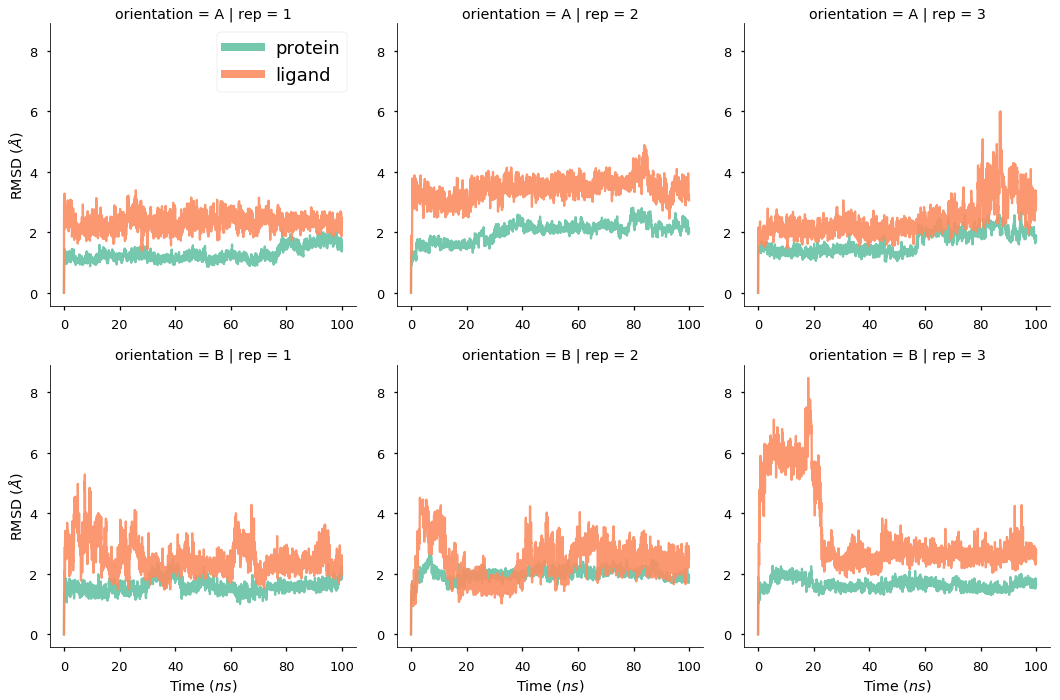

In [11]:
g = sns.FacetGrid(
    data = rmsd_df.query('entity == "protein" or entity == "ligand"'), 
    hue ='entity', hue_order= ['protein', 'ligand'], col = 'rep', row = 'orientation', size =5
)
g.map(plt.plot, 'time', 'RMSD', alpha = 0.9)
g.set_xlabels('Time $(ns)$')
g.set_ylabels('RMSD $(\AA)$')
leg = g.axes[0,0].legend(framealpha=None, fontsize = 18)
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.tight_layout()
plt.savefig('C:/Users/Bruno/ownCloud/publication/ltp_2019/figure_n2.png', dpi=300)
plt.show()

In [1]:
folder_names = dict(
    prup3_lig_A = dict(
        mol='ligand', 
        orientation = 'A',
        dcd = 'C:/scratch/cafe/lig_A/prup3_lig_A_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/lig_A/prup3_lig_A_charmm.psf'
    ),
    prup3_lig_B = dict(
        mol='ligand', 
        orientation = 'B',
        dcd = 'C:/scratch/cafe/lig_B/prup3_lig_B_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/lig_B/prup3_lig_B_charmm.psf'
    ),
    prup3_ps_A = dict(
        mol='phytosphingosine', 
        orientation = 'A',
        dcd = 'C:/scratch/cafe/ps_A/prup3_ps_A_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/ps_A/prup3_ps_A_charmm.psf'
    ),
    prup3_ps_B = dict(
        mol='phytosphingosine', 
        orientation = 'B',
        dcd = 'C:/scratch/cafe/ps_B/prup3_ps_B_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/ps_B/prup3_ps_B_charmm.psf'
    ),
    prup3_s_A = dict(
        mol='sphingosine', 
        orientation = 'A',
        dcd = 'C:/scratch/cafe/sp_A/prup3_s_A_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/sp_A/prup3_s_A_charmm.psf'
    ),
    prup3_s_B = dict(
        mol='sphingosine', 
        orientation = 'B',
        dcd = 'C:/scratch/cafe/sp_B/prup3_s_B_nwater_pbcsolved.dcd',
        psf = 'C:/scratch/cafe/sp_B/prup3_s_B_charmm.psf'
    ),
)


In [6]:
for key, item in folder_names.items():
    psf = pdy.parsePSF(item['psf'])
    dcd = pdy.DCDFile(item['dcd'])
    dcd.link(psf)
    for i, fr in enumerate(dcd):
        if i == 0:
            atoms_ = fr.getAtoms()
            pdy.writePDB(
                filename='C:/Users/Bruno/ownCloud/projects/ltp/data/md/' + key + '_0.pdb',
                atoms = atoms_
            )
        if i == 2472:
            atoms_ = fr.getAtoms()
            pdy.writePDB(
                filename='C:/Users/Bruno/ownCloud/projects/ltp/data/md/' + key + '_2472.pdb',
                atoms = atoms_
            )